In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 1.0 Data Exploration and Cleaning

In [2]:
#Read the data
ad=pd.read_csv('addidas.csv')

ad.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price Per Unit USD,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01/01/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000,300000,50%,In-store
1,Foot Locker,1185732,02/01/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000,150000,30%,In-store
2,Foot Locker,1185732,03/01/2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000,140000,35%,In-store
3,Foot Locker,1185732,04/01/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500,133875,35%,In-store
4,Foot Locker,1185732,05/01/2020,Northeast,New York,New York,Men's Apparel,60.0,900,540000,162000,30%,In-store
5,Foot Locker,1185732,06/01/2020,Northeast,New York,New York,Women's Apparel,50.0,1000,500000,125000,25%,In-store
6,Foot Locker,1185732,07/01/2020,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000,312500,50%,In-store
7,Foot Locker,1185732,08/01/2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000,135000,30%,Outlet
8,Foot Locker,1185732,21/01/2020,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000,133000,35%,Outlet
9,Foot Locker,1185732,22/01/2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250,129938,35%,Outlet


In [3]:
# Display basic statistics and information about the dataset
print(ad.describe())

        Retailer ID  Price Per Unit USD   Units Sold    Total Sales  \
count  9.648000e+03         9648.000000  9648.000000    9648.000000   
mean   1.173850e+06           45.216625   256.930037   93273.437500   
std    2.636038e+04           14.705397   214.252030  141916.016727   
min    1.128299e+06            7.000000     0.000000       0.000000   
25%    1.185732e+06           35.000000   106.000000    4254.500000   
50%    1.185732e+06           45.000000   176.000000    9576.000000   
75%    1.185732e+06           55.000000   350.000000  150000.000000   
max    1.197831e+06          110.000000  1275.000000  825000.000000   

       Operating Profit  
count       9648.000000  
mean       34425.282131  
std        54193.124141  
min            0.000000  
25%         1922.000000  
50%         4371.500000  
75%        52063.000000  
max       390000.000000  


In [3]:
print(ad.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Retailer            9648 non-null   object 
 1   Retailer ID         9648 non-null   int64  
 2   Invoice Date        9648 non-null   object 
 3   Region              9648 non-null   object 
 4   State               9648 non-null   object 
 5   City                9648 non-null   object 
 6   Product             9648 non-null   object 
 7   Price Per Unit USD  9648 non-null   float64
 8   Units Sold          9648 non-null   int64  
 9   Total Sales         9648 non-null   int64  
 10  Operating Profit    9648 non-null   int64  
 11  Operating Margin    9648 non-null   object 
 12  Sales Method        9648 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 980.0+ KB
None


In [4]:
#Using Condition Statement to check duplicates
if ad.duplicated().sum()>0:
    print('Duplicates exist.')
else:
    print("No Duplicate")

#check number of duplicate in the dataframe
ad.duplicated(keep=False).sum()

No Duplicate


0

In [5]:
# Convert 'Invoice Date' to datetime with explicit format
ad['Invoice Date'] = pd.to_datetime(ad['Invoice Date'], 
                    format='%d/%m/%Y', errors='coerce')

# Convert 'Operating Margin' to float
float_columns = ['Operating Margin']

# Convert to float
ad[float_columns] = ad[float_columns].apply(pd.to_numeric, 
                                        errors='coerce')

ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Retailer            9648 non-null   object        
 1   Retailer ID         9648 non-null   int64         
 2   Invoice Date        9648 non-null   datetime64[ns]
 3   Region              9648 non-null   object        
 4   State               9648 non-null   object        
 5   City                9648 non-null   object        
 6   Product             9648 non-null   object        
 7   Price Per Unit USD  9648 non-null   float64       
 8   Units Sold          9648 non-null   int64         
 9   Total Sales         9648 non-null   int64         
 10  Operating Profit    9648 non-null   int64         
 11  Operating Margin    0 non-null      float64       
 12  Sales Method        9648 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), obje

# 2.0 Retailers Analysis

In [6]:
# Check how many retailer in the dataframe
unique_retailers = ad['Retailer'].unique()
print(unique_retailers)

['Foot Locker' 'Walmart' 'Sports Direct' 'West Gear' "Kohl's" 'Amazon']


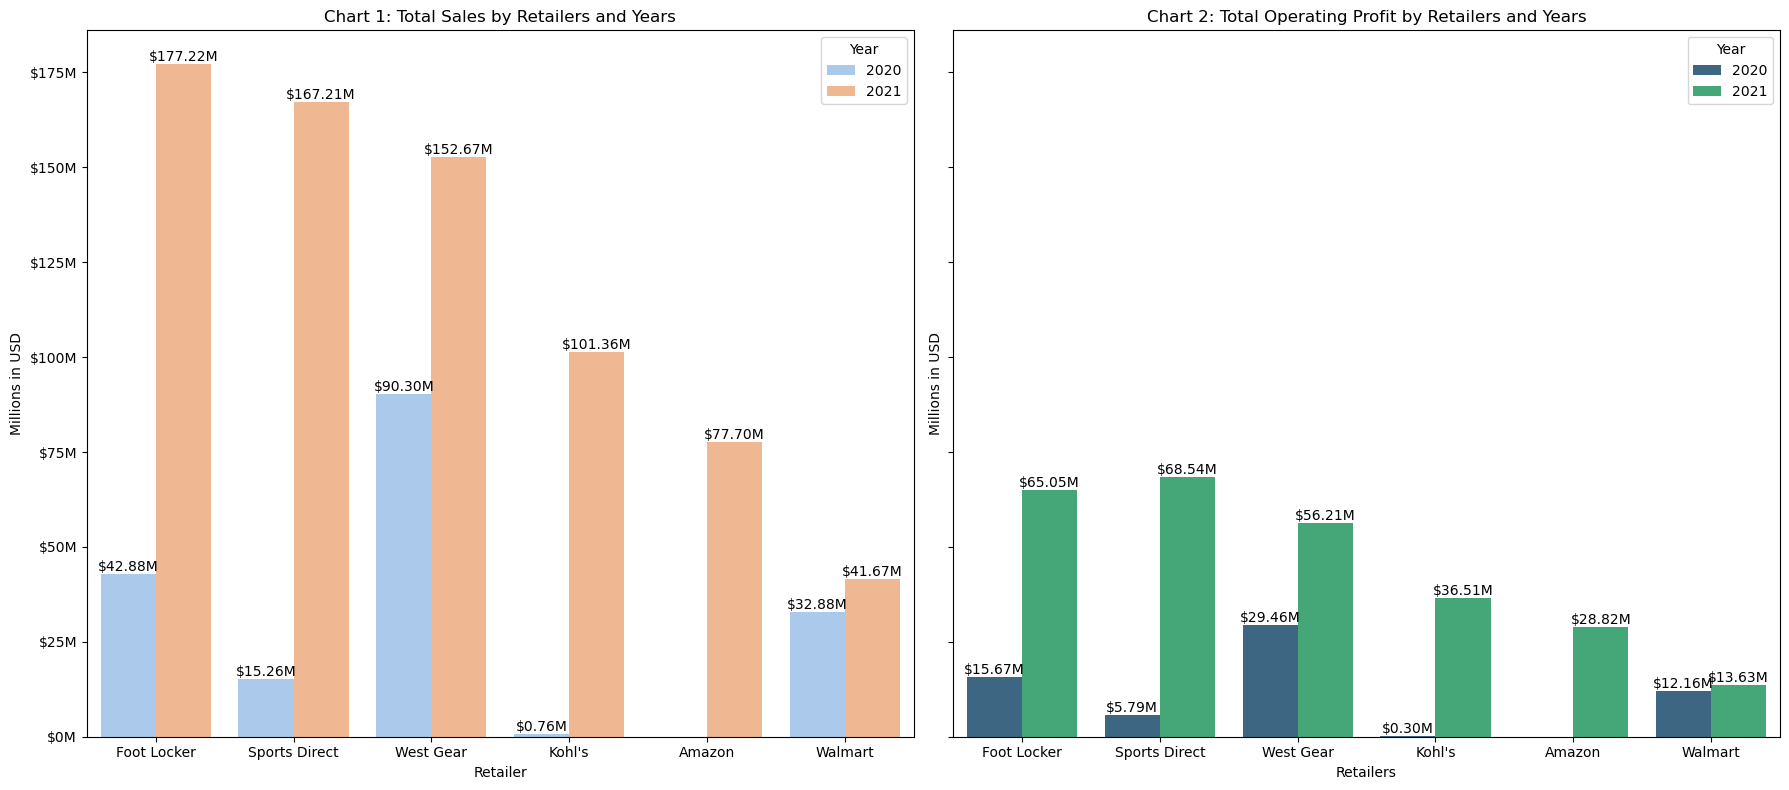

In [7]:
# Convert 'Invoice Date' to datetime
ad['Invoice Date'] = pd.to_datetime(ad['Invoice Date'], format='%d/%m/%Y')

# Extract year from 'Invoice Date'
ad['Year'] = ad['Invoice Date'].dt.year

# Filter the DataFrame for the specified retailers and years
selected_retailers = ['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's", 'Amazon']
filtered_df = ad[ad['Retailer'].isin(selected_retailers)]

# Group by 'Retailer' and 'Year' and sum the 'Total Sales' and 'Operating Profit'
combined_data = filtered_df.groupby(['Retailer', 'Year'])[['Total Sales', 'Operating Profit']].sum().reset_index()


# Sort the results by total sales in descending order
combined_data = combined_data.sort_values(by='Total Sales', ascending=False)


# Create subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Plotting Bar Chart for Total Sales
sns.barplot(x='Retailer', y='Total Sales', hue='Year', data=combined_data, palette='pastel', ax=ax1)

# Annotate each bar with the total sales value
for p in ax1.patches:
    ax1.annotate(f'${p.get_height() / 1e6:.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Format y-axis labels in millions
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x / 1e6:.0f}M'))

ax1.set_title('Chart 1: Total Sales by Retailers and Years')
ax1.set_ylabel('Millions in USD')
ax1.legend(title='Year')

# Plotting Bar Chart for Total Operating Profit
sns.barplot(x='Retailer', y='Operating Profit', hue='Year', data=combined_data, palette='viridis', ax=ax2)

# Annotate each bar with the total operating profit value
for p in ax2.patches:
    ax2.annotate(f'${p.get_height() / 1e6:.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Format y-axis labels in millions
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x / 1e6:.0f}M'))

ax2.set_title('Chart 2: Total Operating Profit by Retailers and Years')
ax2.set_xlabel('Retailers')
ax2.set_ylabel('Millions in USD')
ax2.legend(title='Year')

# Adjust layout
plt.tight_layout()

plt.show()


/Users/sailone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sailone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


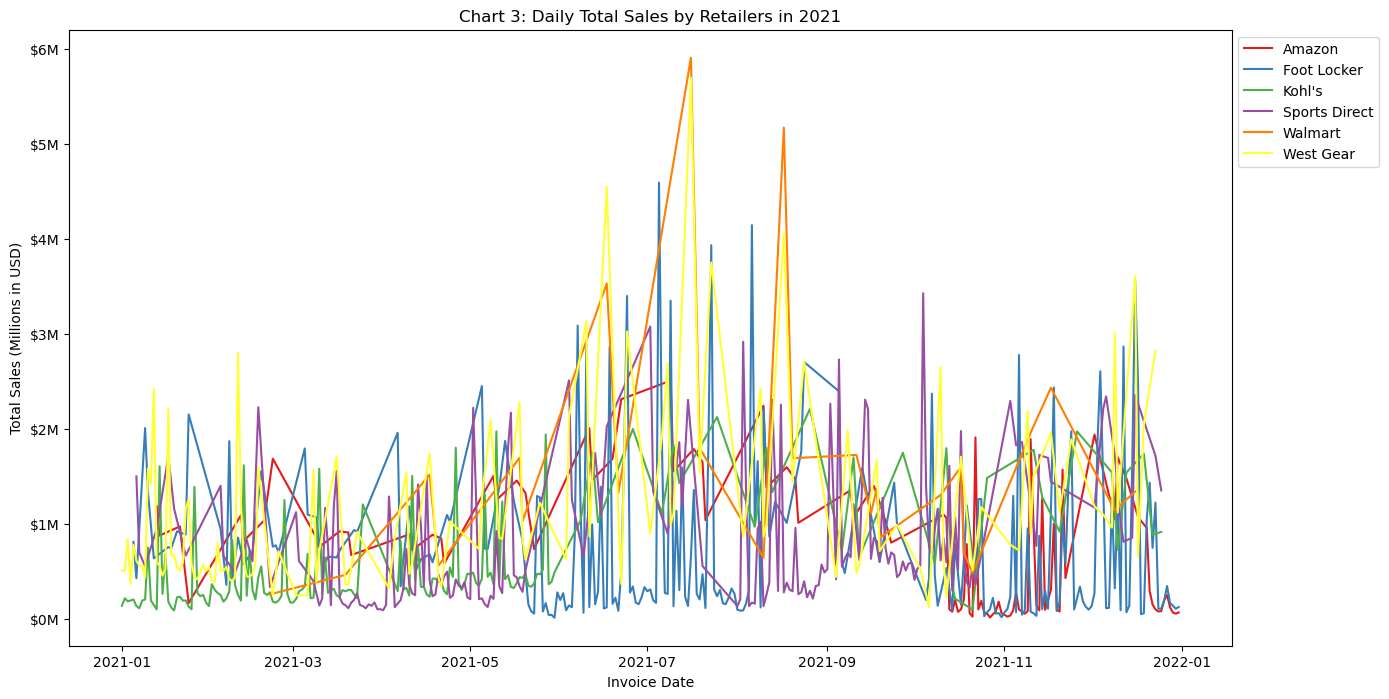

In [11]:
# Filter data for the year 2021
sales_2021 = ad[ad['Invoice Date'].dt.year == 2021]

# Group by Retailer and calculate total sales for 2021
retailer_sales_2021 = sales_2021.groupby(['Retailer', 'Invoice Date'])['Total Sales'].sum().reset_index()

# Plotting Time Series for Total Sales in 2021 by Retailer
plt.figure(figsize=(15, 8))
line_plot = sns.lineplot(x='Invoice Date', y='Total Sales', hue='Retailer', data=retailer_sales_2021, palette='Set1')

# Format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1e6:.0f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Chart 3: Daily Total Sales by Retailers in 2021')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales (Millions in USD)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()



/Users/sailone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sailone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


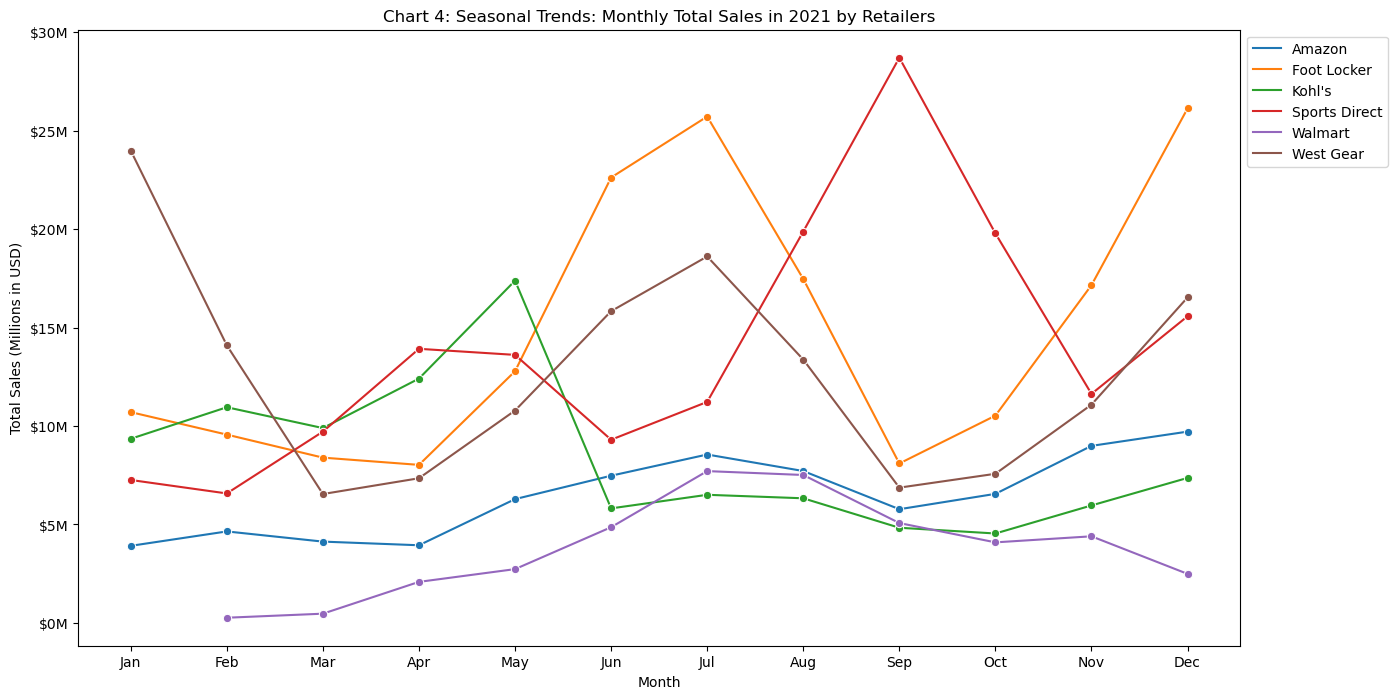

In [9]:
# Filter data for the year 2021
sales_2021 = ad[ad['Invoice Date'].dt.year == 2021].copy()

# Extract month from Invoice Date using .loc
sales_2021.loc[:, 'Month'] = sales_2021['Invoice Date'].dt.month

# Group by Retailer and Month, calculate total sales for 2021
retailer_monthly_sales_2021 = sales_2021.groupby(['Retailer', 'Month'])['Total Sales'].sum().reset_index()

# Plotting Line Chart for Monthly Total Sales in 2021 by Retailer
plt.figure(figsize=(15, 8))
line_plot = sns.lineplot(x='Month', y='Total Sales', hue='Retailer', data=retailer_monthly_sales_2021, marker='o')

# Format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1e6:.0f}M'

plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Chart 4: Seasonal Trends: Monthly Total Sales in 2021 by Retailers')
plt.xlabel('Month')
plt.ylabel('Total Sales (Millions in USD)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


# 3.0 Product Analysis

In [13]:
# Check how many product in the dataframe
unique_product = ad['Product'].unique()
print(unique_product)

["Men's Street Footwear" "Men's Athletic Footwear"
 "Women's Street Footwear" "Women's Athletic Footwear" "Men's Apparel"
 "Women's Apparel"]


In [14]:
unique_price = ad['Price Per Unit USD'].unique()
print(unique_price)

[ 50.  40.  45.  60.  55.  65.  70.  25.  35.  30.  80.  75.  20.  85.
 100.  90.  95.  15.  10. 110. 105.  47.  36.  41.  46.  44.  58.  48.
  39.  43.  59.  56.  49.  54.  64.  53.  61.  62.  68.  52.  66.  51.
  24.  34.  33.  23.  32.  38.  29.  37.  27.  42.  72.  63.  69.  76.
  67.  57.  28.  18.  19.  71.  78.  73.  74.  83.  82.  98.  77.  88.
  86.  14.   9.  97.  81.  79.  96.  84.  89. 103. 101.  87.  92.  31.
  26.  21.  13.  22.  17.  12.  16.  11.   7.   8.]


/Users/sailone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sailone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/15/vkdrxbvn45s_rn0bn39pg_k80000gn/T/ipykernel_19208/3663185084.py:46: UserWarning: Legend does not support handles for Axes instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax1.legend([handles[0], handles[1], line_plot_units], [legend_labels[label] for label in labels] + ['Units Sold (2021)'])


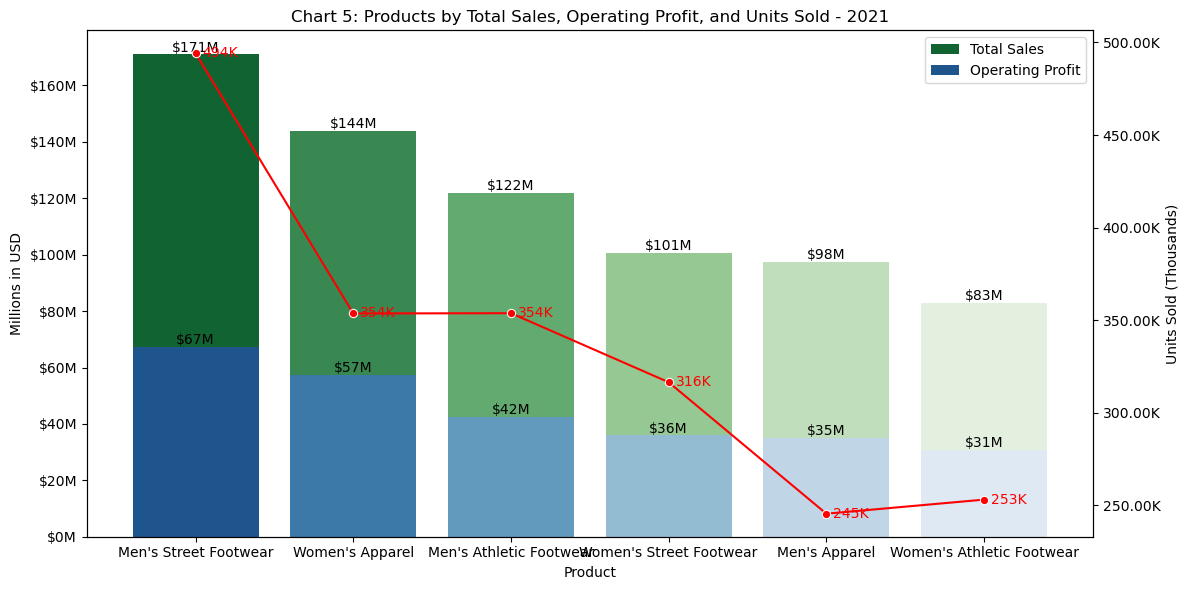

In [10]:
product_analysis_profit_2021 = ad[ad['Year'] == 2021].groupby('Product').agg({
    'Total Sales': 'sum',
    'Operating Profit': 'sum',
    'Units Sold': 'sum'
}).sort_values(by='Total Sales', ascending=False).reset_index()

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Total Sales
bar_plot_2021 = sns.barplot(x='Product', y='Total Sales', data=product_analysis_profit_2021, palette='Greens_r', label='Total Sales (2021)')

# Bar chart for Operating Profit
bar_plot_2021 = sns.barplot(x='Product', y='Operating Profit', data=product_analysis_profit_2021, palette='Blues_r', label='Operating Profit (2021)')

# Annotate Total Sales on top of bars
for p in bar_plot_2021.patches:
    bar_plot_2021.annotate(f'${p.get_height() / 1e6:.0f}M', (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                            textcoords='offset points')

# Format y-axis labels for both Total Sales and Operating Profit
bar_plot_2021.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x / 1e6:.0f}M'))

# Create a secondary axis for Units Sold
ax2 = ax1.twinx()
line_plot_units = sns.lineplot(x='Product', y='Units Sold', data=product_analysis_profit_2021, sort=False, color='red', marker='o', ax=ax2)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x / 1e3:.02f}K'))

# Annotate Units Sold on the right side of the line plot
for x, y in zip(line_plot_units.get_lines()[0].get_xdata(), line_plot_units.get_lines()[0].get_ydata()):
    ax2.annotate(f'{y / 1e3:.0f}K', (x, y), ha='left', va='center', color='red', fontsize=10, xytext=(5, 0),
                 textcoords='offset points')

# Set labels and title
ax1.set_ylabel('Millions in USD')
ax2.set_ylabel('Units Sold (Thousands)')
plt.title('Chart 5: Products by Total Sales, Operating Profit, and Units Sold - 2021')

# Legend with custom labels
legend_labels = {'Total Sales (2021)': 'Total Sales',
                 'Operating Profit (2021)': 'Operating Profit',
                 'Units Sold (2021)': 'Units Sold (Red)'}

handles, labels = ax1.get_legend_handles_labels()
ax1.legend([handles[0], handles[1], line_plot_units], [legend_labels[label] for label in labels] + ['Units Sold (2021)'])

# Show the plot
plt.tight_layout()
plt.show()


# 4.0 Price Range Analysis

/var/folders/15/vkdrxbvn45s_rn0bn39pg_k80000gn/T/ipykernel_19208/4186040822.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_2021['Price Range'] = pd.cut(ad_2021['Price Per Unit USD'], bins=price_bins, labels=price_labels, right=False)
/var/folders/15/vkdrxbvn45s_rn0bn39pg_k80000gn/T/ipykernel_19208/4186040822.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_analysis = ad_2021.groupby(['Product', 'Price Range']).agg({


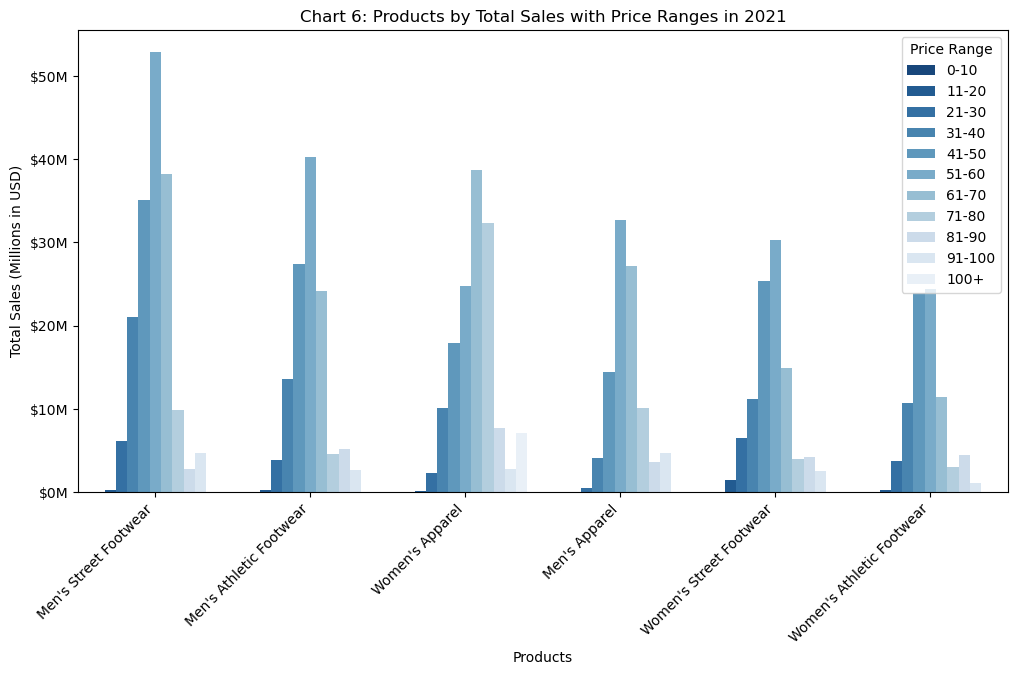

In [18]:
# 2021 Year' is a column in your DataFrame
ad_2021 = ad[ad['Year'] == 2021]

# Define price ranges
price_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, float('inf')]
price_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', '100+']

# Create a new column 'Price Range' based on 'Price Per Unit USD'
ad_2021['Price Range'] = pd.cut(ad_2021['Price Per Unit USD'], bins=price_bins, labels=price_labels, right=False)

# Group by Product and Price Range, calculate total sales
product_analysis = ad_2021.groupby(['Product', 'Price Range']).agg({
    'Total Sales': 'sum'
}).sort_values(by='Total Sales', ascending=False).reset_index()

# Plotting Bar Chart for Top Products by Total Sales with Price Ranges in 2021
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Product', y='Total Sales', hue='Price Range', data=product_analysis, palette='Blues_r')

# Format y-axis labels in millions USD
def millions_formatter(x, pos):
    return f'${x / 1e6:.0f}M'

bar_plot.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.title('Chart 6: Products by Total Sales with Price Ranges in 2021')
plt.xlabel('Products')
plt.ylabel('Total Sales (Millions in USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Range')
plt.show()


/var/folders/15/vkdrxbvn45s_rn0bn39pg_k80000gn/T/ipykernel_19208/2183230582.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_analysis_3 = ad_2021.groupby(['Product', 'Price Range']).agg({


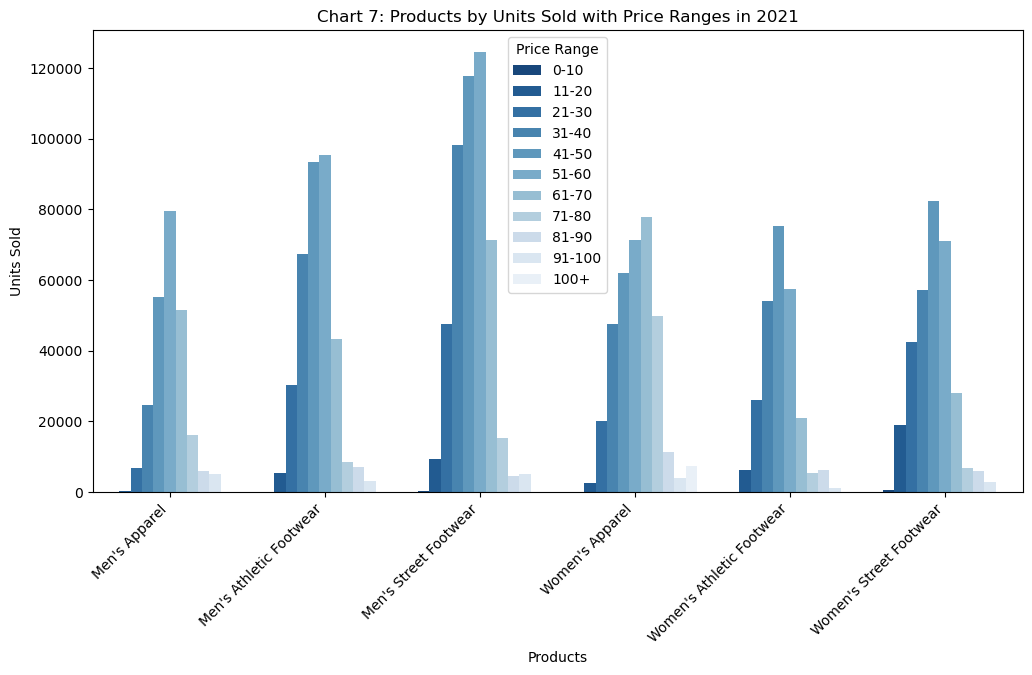

In [19]:
# Group by Product and Price Range, calculate total units sold
product_analysis_3 = ad_2021.groupby(['Product', 'Price Range']).agg({
    'Units Sold': 'sum'
}).reset_index()

# Plotting Bar Chart for Products by Units Sold with Price Ranges
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Product', y='Units Sold', hue='Price Range', data=product_analysis_3, palette='Blues_r')


plt.title('Chart 7: Products by Units Sold with Price Ranges in 2021')
plt.xlabel('Products')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Range')
plt.show()


/var/folders/15/vkdrxbvn45s_rn0bn39pg_k80000gn/T/ipykernel_19208/1391227623.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_analysis_2 = ad_2021.groupby(['Product', 'Price Range']).agg({


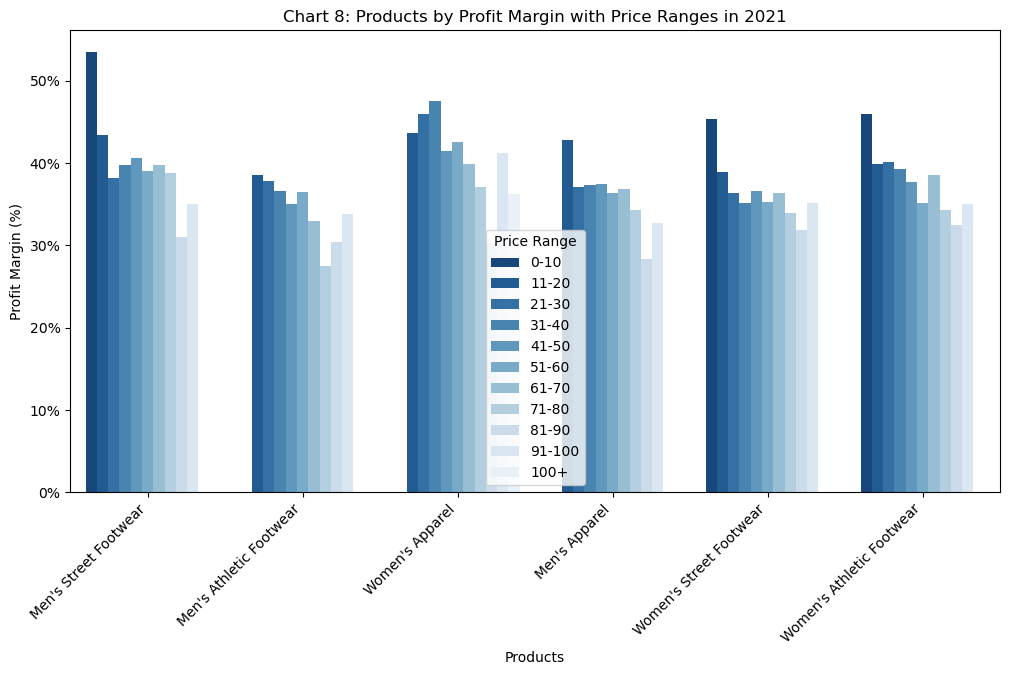

In [20]:
# Group by Product and Price Range, calculate total sales and operating profit
product_analysis_2 = ad_2021.groupby(['Product', 'Price Range']).agg({
    'Total Sales': 'sum',
    'Operating Profit': 'sum'
}).sort_values(by='Total Sales', ascending=False).reset_index()

# Calculate profit margin percentage
product_analysis_2['Profit Margin'] = (product_analysis_2['Operating Profit'] / product_analysis_2['Total Sales']) * 100

# Plotting Bar Chart for Top Products by Total Sales with Price Ranges
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Product', y='Profit Margin', hue='Price Range', data=product_analysis_2, palette='Blues_r')

# Format y-axis labels as percentages
def percent_formatter(x, pos):
    return f'{x:.0f}%'

bar_plot.yaxis.set_major_formatter(FuncFormatter(percent_formatter))

plt.title('Chart 8: Products by Profit Margin with Price Ranges in 2021')
plt.xlabel('Products')
plt.ylabel('Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Price Range')
plt.show()


# 5.0 Sales Method Analysis

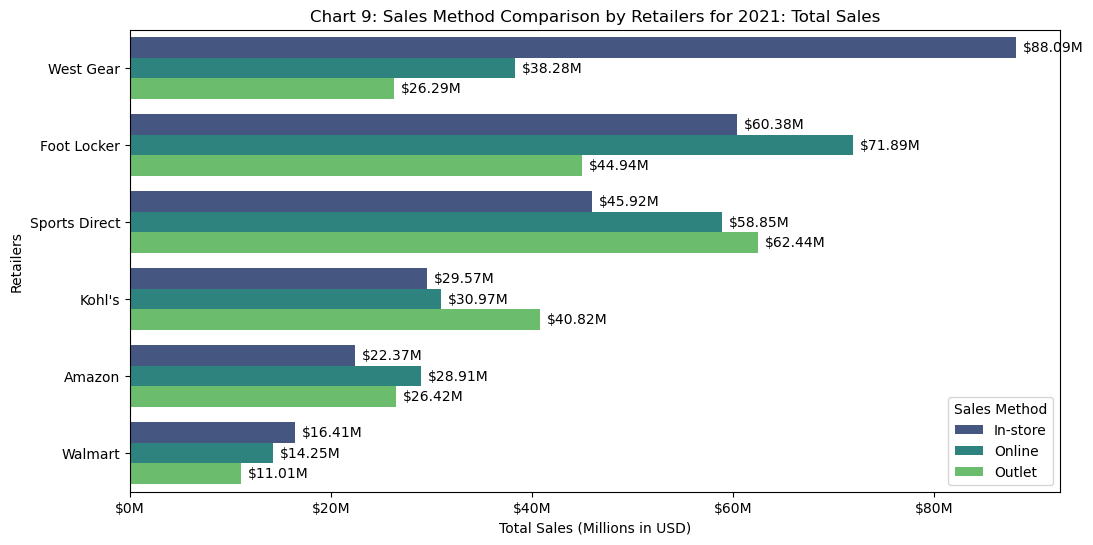

   Sales Method       Retailer  Total Sales  Contribution (%)
5      In-store      West Gear     88090500         36.602521
7        Online    Foot Locker     71890450         33.873732
15       Outlet  Sports Direct     62441652         29.523746
1      In-store    Foot Locker     60384250         36.602521
9        Online  Sports Direct     58845994         33.873732
3      In-store  Sports Direct     45922250         36.602521
13       Outlet    Foot Locker     44943215         29.523746
14       Outlet         Kohl's     40816274         29.523746
11       Online      West Gear     38281378         33.873732
8        Online         Kohl's     30973726         33.873732
2      In-store         Kohl's     29566250         36.602521
6        Online         Amazon     28909731         33.873732
12       Outlet         Amazon     26422931         29.523746
17       Outlet      West Gear     26293189         29.523746
0      In-store         Amazon     22366250         36.602521
4      I

In [21]:
ad_2021 = ad[ad['Year'] == 2021]

# Group by Sales Method and Retailer, calculate total sales for 2021
sales_method_comparison_retailer_2021 = ad_2021.groupby(['Sales Method', 'Retailer'])['Total Sales'].sum().reset_index()

# Sort by Total Sales in descending order
sales_method_comparison_retailer_2021 = sales_method_comparison_retailer_2021.sort_values(by='Total Sales', ascending=False)

# Bar plot for Sales Method Comparison by Retailer for 2021
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Total Sales', y='Retailer', hue='Sales Method', data=sales_method_comparison_retailer_2021, palette='viridis')

# Format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1e6:.0f}M'

bar_plot.xaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Annotate each bar with the total sales value
for p in bar_plot.patches:
    bar_plot.annotate(f'${p.get_width() / 1e6:.2f}M', (p.get_width(), p.get_y() + p.get_height() / 2.),
                      ha='left', va='center', fontsize=10, color='black', xytext=(5, 0),
                      textcoords='offset points')
    
plt.title('Chart 9: Sales Method Comparison by Retailers for 2021: Total Sales')
plt.xlabel('Total Sales (Millions in USD)')
plt.ylabel('Retailers')
plt.legend(title='Sales Method')
plt.show()

# Calculate the percentage contribution of each sales method to overall sales for 2021
sales_method_comparison_retailer_2021['Contribution (%)'] = (sales_method_comparison_retailer_2021.groupby('Sales Method')['Total Sales'].transform('sum') / sales_method_comparison_retailer_2021['Total Sales'].sum()) * 100

# Display the contribution for 2021
print(sales_method_comparison_retailer_2021[['Sales Method', 'Retailer', 'Total Sales', 'Contribution (%)']])


# 6.0 Geographical States Analysis

In [22]:
unique_state = ad['State'].unique()
print(unique_state)

import numpy as np 

count=len(unique_state)
count

['New York' 'Texas' 'California' 'Illinois' 'Pennsylvania' 'Nevada'
 'Colorado' 'Washington' 'Florida' 'Minnesota' 'Montana' 'Tennessee'
 'Nebraska' 'Alabama' 'Maine' 'Alaska' 'Hawaii' 'Wyoming' 'Virginia'
 'Michigan' 'Missouri' 'Utah' 'Oregon' 'Louisiana' 'Idaho' 'Arizona'
 'New Mexico' 'Georgia' 'South Carolina' 'North Carolina' 'Ohio'
 'Kentucky' 'Mississippi' 'Arkansas' 'Oklahoma' 'Kansas' 'South Dakota'
 'North Dakota' 'Iowa' 'Wisconsin' 'Indiana' 'West Virginia' 'Maryland'
 'Delaware' 'New Jersey' 'Connecticut' 'Rhode Island' 'Massachusetts'
 'Vermont' 'New Hampshire']


50

In [23]:
ad_ak=ad[ad['State']=='Alaska']
ad_ak

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price Per Unit USD,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Year,Price Range
1224,Amazon,1185732,2021-01-24,West,Alaska,Anchorage,Women's Apparel,55.0,300,165000,49500,NaN,Outlet,2021,51-60
1225,Amazon,1185732,2021-02-22,West,Alaska,Anchorage,Men's Street Footwear,55.0,575,316250,110688,NaN,Outlet,2021,51-60
1226,Amazon,1185732,2021-02-22,West,Alaska,Anchorage,Men's Athletic Footwear,55.0,225,123750,43313,NaN,Outlet,2021,51-60
1227,Amazon,1185732,2021-02-22,West,Alaska,Anchorage,Women's Street Footwear,45.0,275,123750,30938,NaN,Outlet,2021,41-50
1228,Amazon,1185732,2021-02-22,West,Alaska,Anchorage,Women's Athletic Footwear,50.0,175,87500,21875,NaN,Outlet,2021,51-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5179,Foot Locker,1128299,2021-01-10,West,Alaska,Anchorage,Men's Apparel,46.0,46,2116,635,NaN,Online,2021,41-50
5180,Foot Locker,1128299,2021-01-10,West,Alaska,Anchorage,Women's Apparel,42.0,123,5166,2790,NaN,Online,2021,41-50
5181,Foot Locker,1128299,2021-02-10,West,Alaska,Anchorage,Men's Street Footwear,33.0,143,4719,1699,NaN,Online,2021,31-40
5182,Foot Locker,1128299,2021-02-10,West,Alaska,Anchorage,Men's Athletic Footwear,42.0,98,4116,1317,NaN,Online,2021,41-50


In [35]:
import geopandas as gpd

# Load the cities shapefile
states_shapefile_path = 'tl_2022_us_state.shp'
states = gpd.read_file(states_shapefile_path)

states

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677763373,1323686975,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ..."
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049908397,2391592787,+44.3484222,-114.5588538,"POLYGON ((-116.35844 49.00047, -116.34805 49.0..."
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190126218,1025960758,+43.6726907,-071.5843145,"POLYGON ((-70.83887 43.24449, -70.83886 43.244..."
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125935585728,13453835222,+35.5397100,-079.1308636,"POLYGON ((-77.89977 36.54460, -77.89942 36.544..."
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23872569964,1030754610,+44.0589536,-072.6710173,"POLYGON ((-72.04187 44.15665, -72.04180 44.156..."


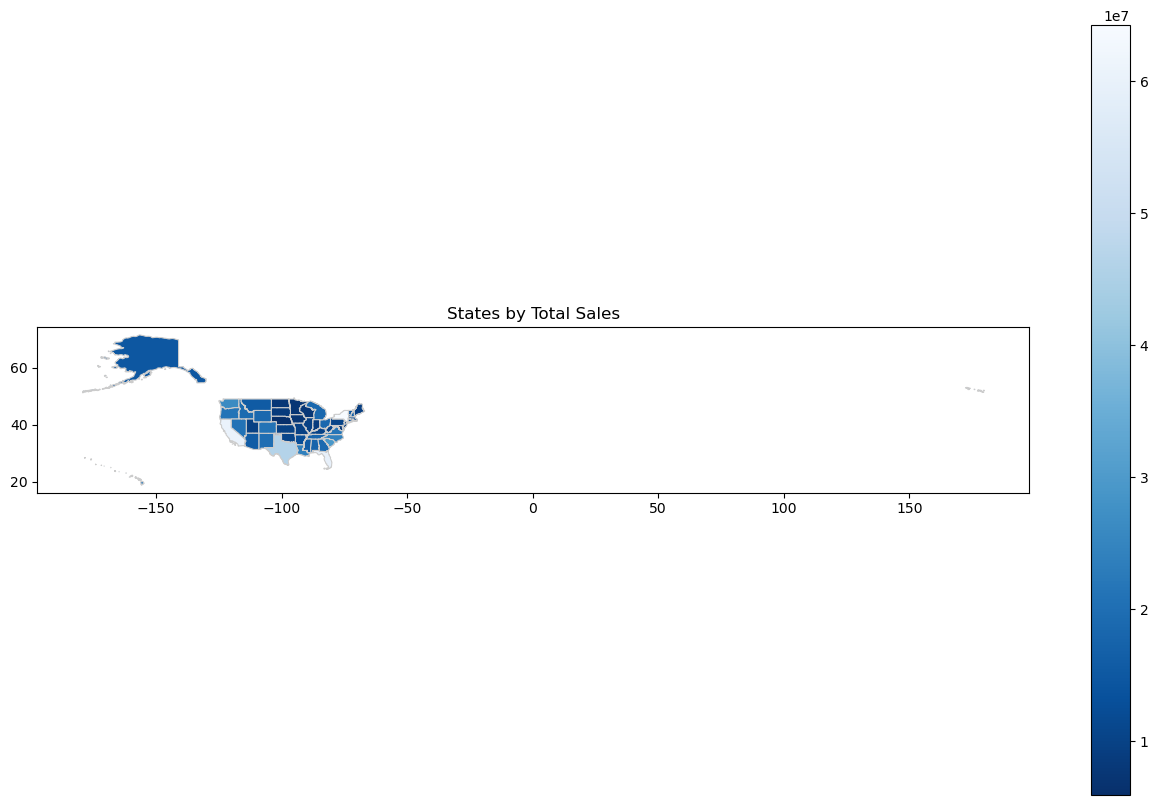

In [19]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Load the states shapefile
states_shapefile_path = 'tl_2022_us_state.shp'
states = gpd.read_file(states_shapefile_path)

# Merge State geometries with total sales data
states_analysis = ad.groupby('State').agg({
    'Total Sales': 'sum'
}).reset_index()

# Assuming that the 'NAME' column in the states shapefile corresponds to the 'State' column in your data
states = states.merge(states_analysis, how='left', left_on='NAME', right_on='State')

# Enlarge the Geo Map
fig, ax = plt.subplots(figsize=(16, 10))  # Adjust the figsize as needed
states.plot(column='Total Sales', cmap='Blues_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

plt.title('States by Total Sales')
plt.show()


In [36]:
import plotly.express as px

# Group by State and calculate total sales
state_total_sales = ad_2021.groupby('State')['Total Sales'].sum().reset_index()

# Create a treemap chart with custom data
fig = px.treemap(state_total_sales, path=['State'], values='Total Sales',
                 title='Chart 10: Total Sales by States in 2021 - Treemap',
                 color='Total Sales', color_continuous_scale='Blues',
                 custom_data=['Total Sales'])

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))

# Add text annotations to display state and total sales data on each bar
fig.update_traces(texttemplate='%{label}<br> %{customdata[0]:,.2f}', textposition='middle center')

# Show figure
fig.show()


/Users/sailone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/sailone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



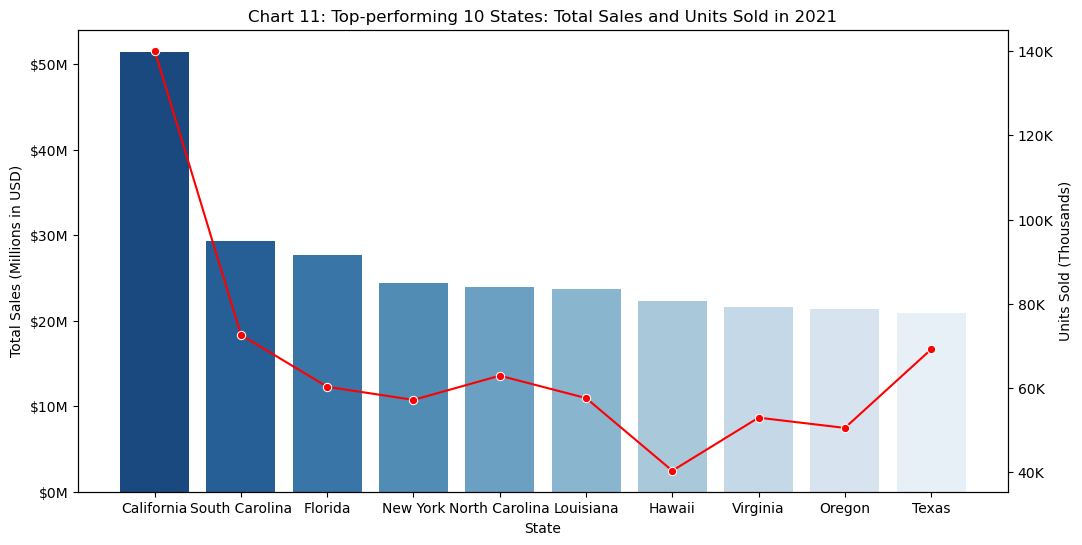

In [29]:
# Filter data for the year 2021
ad_2021 = ad[ad['Year'] == 2021]

# Group by State and calculate total sales and total units sold for 2021
state_analysis = ad_2021.groupby('State').agg({
    'Total Sales': 'sum',
    'Units Sold': 'sum'
}).reset_index()

# Sort the DataFrame by 'Total Sales' in descending order
state_analysis = state_analysis.sort_values(by='Total Sales', ascending=False)

# Select the top 10 states
top_10_states = state_analysis.head(10)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Total Sales
bar_plot_sales = sns.barplot(x='State', y='Total Sales', data=top_10_states, palette='Blues_r', ax=ax1)
bar_plot_sales.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x / 1e6:.0f}M'))

# Create a secondary axis for Units Sold
ax2 = ax1.twinx()
line_plot_units = sns.lineplot(x='State', y='Units Sold', data=top_10_states, sort=False, color='red', marker='o', ax=ax2)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x / 1e3:.0f}K'))

# Set labels and title
ax1.set_ylabel('Total Sales (Millions in USD)')
ax2.set_ylabel('Units Sold (Thousands)')
plt.title('Chart 11: Top-performing 10 States: Total Sales and Units Sold in 2021')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


/Users/sailone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/Users/sailone/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



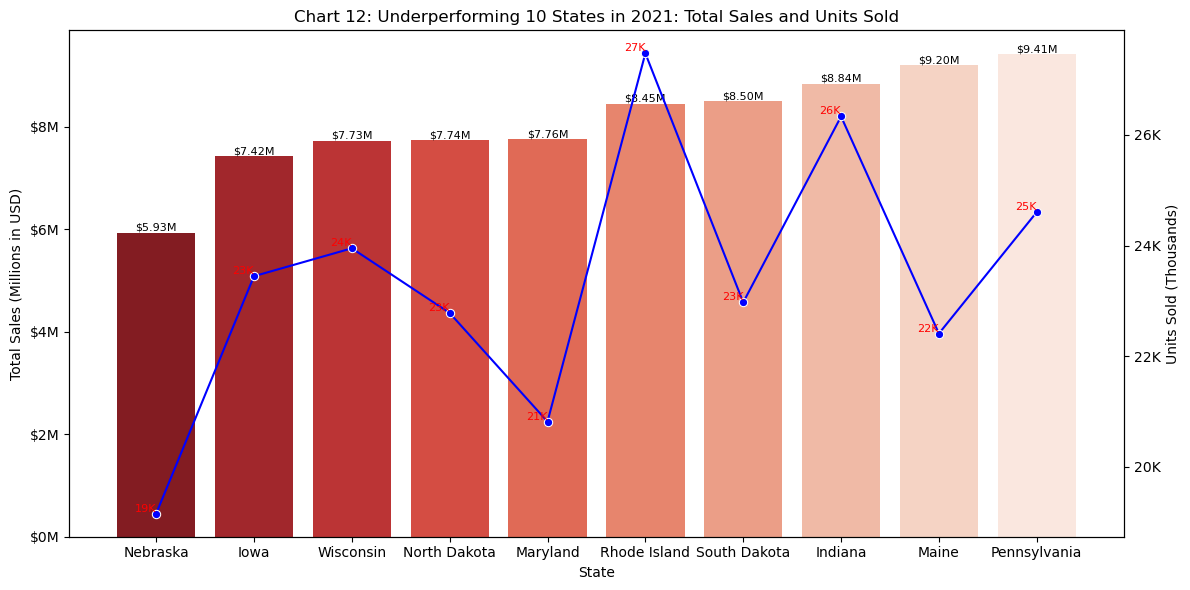

In [37]:
# Sort the DataFrame by 'Total Sales' in descending order
state_analysis_bottom = state_analysis.sort_values(by='Total Sales', ascending=True)

# Select the bottom 10 states
bottom_10_states = state_analysis_bottom.head(10)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Total Sales
bar_plot_sales = sns.barplot(x='State', y='Total Sales', data=bottom_10_states, palette='Reds_r', ax=ax1)
bar_plot_sales.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x / 1e6:.0f}M'))

# Create a secondary axis for Units Sold
ax2 = ax1.twinx()
line_plot_units = sns.lineplot(x='State', y='Units Sold', data=bottom_10_states, sort=False, color='blue', marker='o', ax=ax2)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{x / 1e3:.0f}K'))

# Add numbers on each bar
for i, v in enumerate(bottom_10_states['Total Sales']):
    ax1.text(i, v, f'${v / 1e6:.2f}M', ha='center', va='bottom', color='black', fontsize=8)

# Add numbers on each line point
for x, y in zip(line_plot_units.get_lines()[0].get_xdata(), line_plot_units.get_lines()[0].get_ydata()):
    ax2.text(x, y, f'{y / 1e3:.0f}K', ha='right', va='bottom', color='red', fontsize=8)

# Set labels and title
ax1.set_ylabel('Total Sales (Millions in USD)')
ax2.set_ylabel('Units Sold (Thousands)')
plt.title('Chart 12: Underperforming 10 States in 2021: Total Sales and Units Sold')

# Rotate x-axis text
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

# Show the plot
plt.tight_layout()
plt.show()
